In [70]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from modules.dataloader import load_data
from modules.utils import display_line, seed_fix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
view_log_train, article_info, submission = load_data()

In [5]:
view_log_train.isnull().sum()

userID         0
articleID      0
userRegion     0
userCountry    0
dtype: int64

In [8]:
view_log_train.shape

(42717, 4)

In [9]:
view_log_train['userID'].nunique()

1415

In [11]:
view_log_train['userRegion'].unique()

array(['NY', 'CA', 'SP', 'MG', 'RJ', 'PA', 'Unknown', 'NJ', 'TX', 'IL',
       'GA', 'VA', 'AZ', 'ES', 'GO', 'SC', 'CE', 'PI', 'PR', 'MI', 'DC',
       'BE', 'HE', 'BA', 'BW', 'MA', 'OH', 'FL', 'RS', 'BOL', 'DF', 'MN',
       'LA', 'IN', 'NSW', 'QLD', 'AB', 'PE', 'RM', 'NH', 'BC', 'ENG',
       'ZH', 'CO', 'KS', 'NE', 'WI', 'CT', 'MO', 'CL', 'MS', 'MT', 'WA',
       'NV', 'ON', 'NC'], dtype=object)

In [12]:
view_log_train['userCountry'].unique()

array(['US', 'BR', 'JP', 'KR', 'CN', 'DE', 'PT', 'CO', 'AU', 'MY', 'SG',
       'CA', 'IE', 'IT', 'AR', 'CL', 'NL', 'GB', 'CH', 'ES', 'IS'],
      dtype=object)

In [6]:
article_info.sample().T

,2083
articleID,ARTICLE_2083
Title,Coca-cola traz ao Brasil sabores cereja e baun...
Content,Antes reclusas a países como os EUA e Reino Un...
Format,HTML
Language,pt
userID,USER_1005
userCountry,NaN
userRegion,NaN


In [13]:
article_info.shape

(3008, 8)

In [7]:
article_info.isnull().sum()

articleID         0
Title             0
Content           0
Format            0
Language          0
userID            0
userCountry    2349
userRegion     2351
dtype: int64

In [14]:
user_article_matrix = view_log_train.groupby(['userID', 'articleID']).size().unstack(fill_value=0)

In [21]:
user_article_matrix.sample()

articleID,ARTICLE_0000,ARTICLE_0001,ARTICLE_0002,ARTICLE_0003,ARTICLE_0004,ARTICLE_0005,ARTICLE_0006,ARTICLE_0007,ARTICLE_0008,ARTICLE_0009,...,ARTICLE_2998,ARTICLE_2999,ARTICLE_3000,ARTICLE_3001,ARTICLE_3002,ARTICLE_3003,ARTICLE_3004,ARTICLE_3005,ARTICLE_3006,ARTICLE_3007
userID,,,,,,,,,,,,,,,,,,,,,
USER_1163,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
dup = view_log_train.groupby(['userID', 'articleID']).size().reset_index(name='count')

In [83]:
dup = dup[dup['count'] > 1]

In [85]:
dup

,userID,articleID,count
1,USER_0000,ARTICLE_0411,3
6,USER_0000,ARTICLE_1033,2
10,USER_0000,ARTICLE_1260,2
11,USER_0000,ARTICLE_1345,2
17,USER_0000,ARTICLE_2255,4
...,...,...,...
31643,USER_1420,ARTICLE_1732,3
31644,USER_1420,ARTICLE_1848,3
31645,USER_1420,ARTICLE_1901,2
31652,USER_1420,ARTICLE_2622,3


In [84]:
top_dup = dup.sort_values('count', ascending=False).head(10).reset_index(drop=True)

In [80]:
top_dup

,userID,articleID,count
0,USER_0401,ARTICLE_0241,37
1,USER_0535,ARTICLE_1159,35
2,USER_1419,ARTICLE_2782,34
3,USER_0158,ARTICLE_2928,32
4,USER_0589,ARTICLE_2126,31
5,USER_1204,ARTICLE_1945,27
6,USER_1395,ARTICLE_2698,27
7,USER_0220,ARTICLE_2223,25
8,USER_1194,ARTICLE_2309,24
9,USER_1144,ARTICLE_2570,22


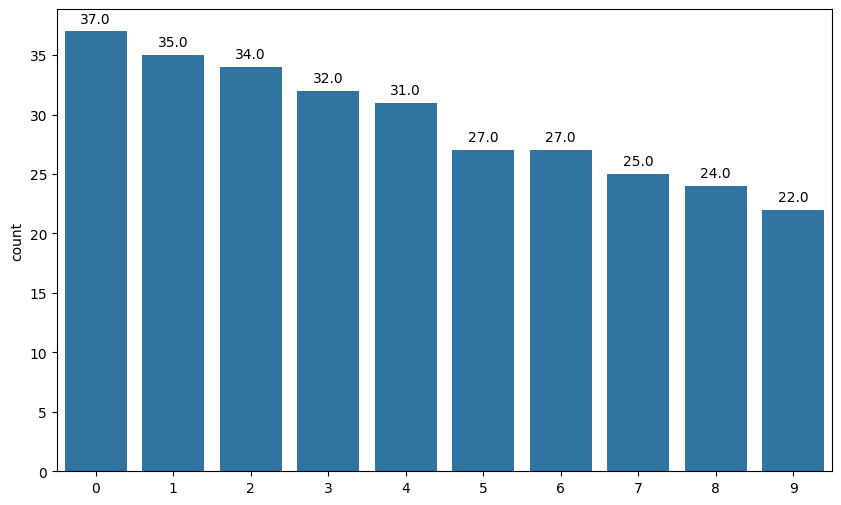

In [88]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(top_dup['count'], dodge=False)

# 각 막대 위에 값 표시
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

In [54]:
dup.groupby('userID').size()

userID
USER_0000    25
USER_0001    10
USER_0002     8
USER_0003     4
USER_0004    14
             ..
USER_1416     2
USER_1417    26
USER_1418    10
USER_1419    14
USER_1420    35
Length: 1415, dtype: int64

In [89]:
article_info.sample().T

,114
articleID,ARTICLE_0114
Title,Bitcoin For A Tesla Model 3...Yes That Happened
Content,"Well, it certainly has been a banner week for ..."
Format,HTML
Language,en
userID,USER_0964
userCountry,NaN
userRegion,NaN


In [90]:
article_info['Format'].unique()

array(['HTML', 'VIDEO', 'RICH'], dtype=object)

In [91]:
article_info[article_info['Format'] == 'VIDEO'].sample().T

,531
articleID,ARTICLE_0531
Title,BrasilART - Efeito Paralax e Câmera Multiplano...
Content,"Neste vídeo, Walt Disney explica o ""Efeito Par..."
Format,VIDEO
Language,pt
userID,USER_0264
userCountry,NaN
userRegion,NaN
